In [36]:
import pandas as pd
import numpy as np

In [37]:
liver = pd.read_csv(r"liver.csv")

In [38]:
liver

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,LiverPatient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [39]:
liver
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age             583 non-null int64
Gender          583 non-null object
TB              583 non-null float64
DB              583 non-null float64
Alkphos         583 non-null int64
Sgpt            583 non-null int64
Sgot            583 non-null int64
TP              583 non-null float64
ALB             583 non-null float64
AG              579 non-null float64
LiverPatient    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
liver["Gender"] = label_encoder.fit_transform(liver["Gender"])


In [41]:
liver['TB']=liver['TB'].astype(int)
liver['DB']=liver['DB'].astype(int)
liver['TP']=liver['TP'].astype(int)
liver['ALB']=liver['ALB'].astype(int)

In [42]:
nan_mask = np.isnan(liver['AG'])
inf_mask = np.isinf(liver['AG'])
liver[nan_mask | inf_mask] = 0
liver['AG']=liver['AG'].astype(int)

In [43]:
x = liver.iloc[:,0:10].values
x

array([[65,  0,  0, ...,  6,  3,  0],
       [62,  1, 10, ...,  7,  3,  0],
       [62,  1,  7, ...,  7,  3,  0],
       ...,
       [52,  1,  0, ...,  6,  3,  1],
       [31,  1,  1, ...,  6,  3,  1],
       [38,  1,  1, ...,  7,  4,  1]], dtype=int64)

In [44]:
y = liver.iloc[:,10].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

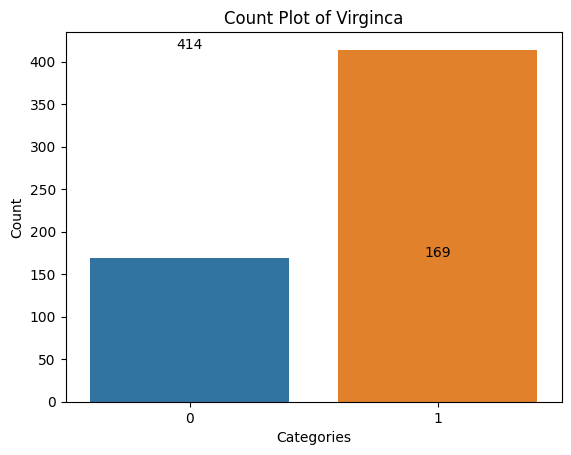

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.countplot(data=liver, x="LiverPatient")
value_counts = liver["LiverPatient"].value_counts()
for i,count in enumerate(value_counts):
    plot.text(x=i,y=count+1,s=str(count),ha="center")
plot.set_xlabel("Categories")
plot.set_ylabel("Count")
plot.set_title("Count Plot of Virginca")
plt.show()

In [46]:
labels = set(y)
labels

{0, 1}

In [47]:
x

array([[65,  0,  0, ...,  6,  3,  0],
       [62,  1, 10, ...,  7,  3,  0],
       [62,  1,  7, ...,  7,  3,  0],
       ...,
       [52,  1,  0, ...,  6,  3,  1],
       [31,  1,  1, ...,  6,  3,  1],
       [38,  1,  1, ...,  7,  4,  1]], dtype=int64)

In [48]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
print("x shape is",x.shape)
print("Y shape is",y.shape)
print("x_test shape is",x_test.shape)
print("X_train shape is",x_train.shape)
print("y_train shape is",y_train.shape)
print("y_test shape is",y_test.shape)

x shape is (583, 10)
Y shape is (583,)
x_test shape is (117, 10)
X_train shape is (466, 10)
y_train shape is (466,)
y_test shape is (117,)


In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)

AttributeError: 'str' object has no attribute 'decode'

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)


Accuracy: 0.63
Original y_test values are  [0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1]
predicted y_test values are [0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1]
